## import libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from xgboost import XGBClassifier 

from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

## load dataset

In [2]:
# load random undersampling data
X_rus_train = pd.read_csv('data/rus/X_rus_train.csv')
X_rus_test = pd.read_csv('data/rus/X_rus_test.csv')

y_rus_train = pd.read_csv('data/rus/y_rus_train.csv')
y_rus_test = pd.read_csv('data/rus/y_rus_test.csv')

## train XGBClassifier on random undersampling dataset

XGBoost hyperparameters:
- n_estimators: number of weak learners(trees) in algorithm(in fact number of boostings)
- max_depth: maximum depth of the trees in algorithm
- min_child_weight: minimum sum of instance weight (hessian) needed in a child.

### finding the best n_estimator

In [3]:
N_ESTIMATORS = np.arange(20, 200, 5)
ACC = []
best_acc = 0
best_n_estimator = 0

In [4]:
for n_estimator in N_ESTIMATORS:
    model_xgb = XGBClassifier(
        n_estimators = n_estimator, objective='binary:logistic',
        seed=7
    )

    model_xgb.fit(X_rus_train, y_rus_train)
    y_pred = model_xgb.predict(X_rus_test)
    accuracy = accuracy_score(y_true=y_rus_test, y_pred=y_pred)
    ACC.append(accuracy)

    if accuracy > best_acc:
        best_acc = accuracy
        best_n_estimator = n_estimator

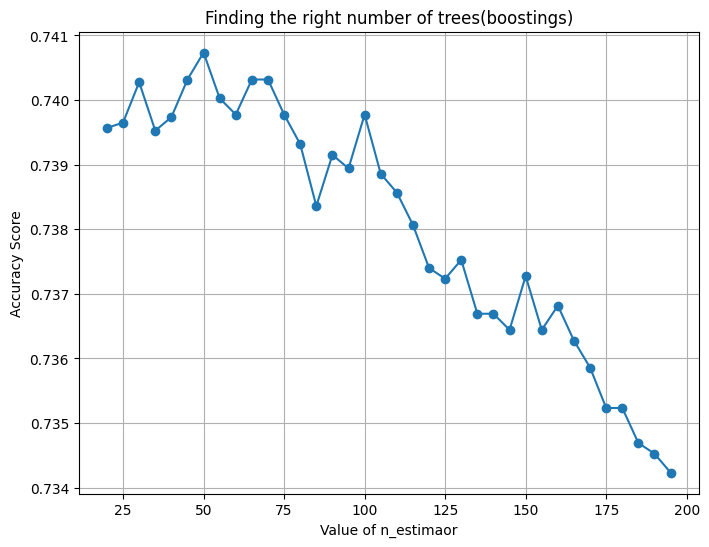

In [5]:
plt.figure(figsize=(8, 6))
plt.plot(N_ESTIMATORS, ACC, marker = "o")
plt.xlabel("Value of n_estimaor")
plt.ylabel("Accuracy Score")
plt.title("Finding the right number of trees(boostings)")
plt.grid()

In [7]:
print('the best number of trees (boostings) in forest is:', best_n_estimator)
print('the best accuracy with {} number of trees (boostings) is {}'.format(best_n_estimator, best_acc))

the best number of trees (boostings) in forest is: 50
the best accuracy with 50 number of trees (boostings) is 0.7407345645558011


### finding the right max_depth

In [8]:
MAX_DEPTHS = np.arange(2, 24, 2)
ACC = []
best_acc = 0
best_max_depth = 0

In [9]:
for max_depth in MAX_DEPTHS:
    model_xgb = XGBClassifier(
        n_estimators = best_n_estimator, objective='binary:logistic',
        max_depth = max_depth, seed=7
    )

    model_xgb.fit(X_rus_train, y_rus_train)
    y_pred = model_xgb.predict(X_rus_test)
    accuracy = accuracy_score(y_true=y_rus_test, y_pred=y_pred)
    ACC.append(accuracy)

    if accuracy > best_acc:
        best_acc = accuracy
        best_max_depth = max_depth

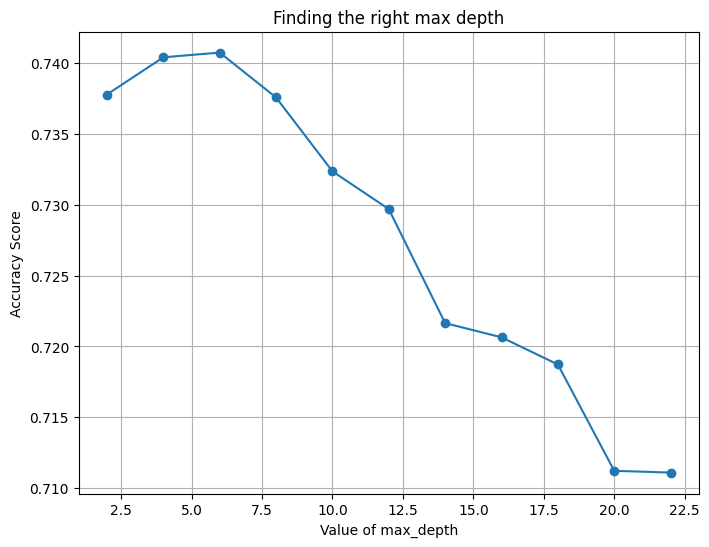

In [12]:
plt.figure(figsize=(8,6))
plt.plot(MAX_DEPTHS, ACC, marker = "o")
plt.xlabel("Value of max_depth")
plt.ylabel("Accuracy Score")
plt.title("Finding the right max depth")
plt.grid()

In [11]:
print('the best max depth in forest is:', best_max_depth)
print('the best accuracy with {} max_depth is {}'.format(best_max_depth, best_acc))

the best max depth in forest is: 6
the best accuracy with 6 max_depth is 0.7407345645558011


### finding the right min_child_weight

In [13]:
MIN_CHILD_WEIGHT = [1, 2, 5, 10, 20, 50, 100]
ACC = []
best_acc = 0
best_min_child_weight = 0

In [15]:
for min_child_weight in MIN_CHILD_WEIGHT:
    model_xgb = XGBClassifier(
        n_estimators = best_n_estimator, objective='binary:logistic',
        max_depth = best_max_depth, min_child_weight=min_child_weight, seed=7
    )

    model_xgb.fit(X_rus_train, y_rus_train)
    y_pred = model_xgb.predict(X_rus_test)
    accuracy = accuracy_score(y_true=y_rus_test, y_pred=y_pred)
    ACC.append(accuracy)

    if accuracy > best_acc:
        best_acc = accuracy
        best_min_child_weight = min_child_weight

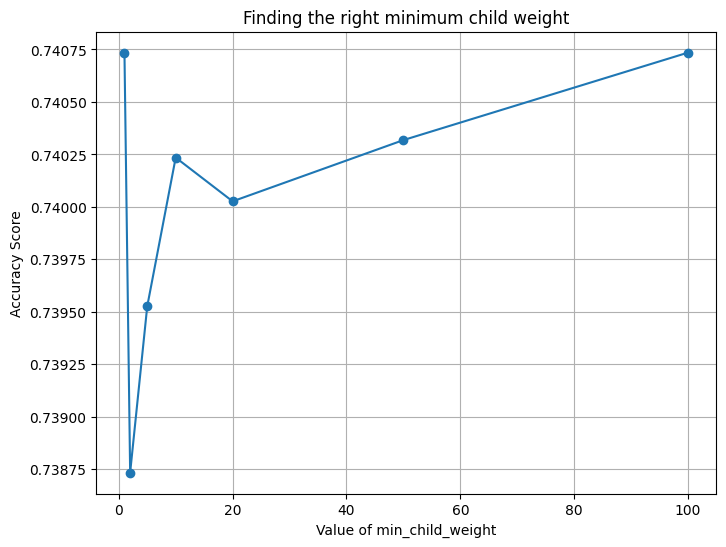

In [16]:
plt.figure(figsize=(8, 6))
plt.plot(MIN_CHILD_WEIGHT, ACC, marker = "o")
plt.xlabel("Value of min_child_weight")
plt.ylabel("Accuracy Score")
plt.title("Finding the right minimum child weight")
plt.grid()

In [17]:
print('the best minimum child weight in forest is:', best_min_child_weight)
print('the best accuracy with {} min_child_weight is {}'.format(best_min_child_weight, best_acc))

the best minimum child weight in forest is: 1
the best accuracy with 1 min_child_weight is 0.7407345645558011


### best hyperparameters

In [18]:
print('on random undersampling the best hyperparameters with accuracy {} are:'.format(best_acc))
print(f'{best_n_estimator = }, {best_max_depth = }, {best_min_child_weight = }')

on random undersampling the best hyperparameters with accuracy 0.7407345645558011 are:
best_n_estimator = 50, best_max_depth = 6, best_min_child_weight = 1
